---
---

## Etapa 03 - SVM (SVC e SVR) e CNN

    - SVM: Máquina de Vetor de Suporte
    - CNN: Rede Neural Convolucional

### Instruções:

1. Deverá ser implementada as seguintes Redes Neurais Artificiais:
    * `SVM Classificador` (_Support Vector Machine : Regression_), utilizando a biblioteca `sklearn`, svm.SVC:
        - https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
    * `SVM Regressor` (_Support Vector Machine : Classification_), utilizando a biblioteca `sklearn`, svm.SVR:
        - https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR
    * `CNN` (_Convolutional Neural Networks_), utilizando a biblioteca `tensorflow` com a base de dados `CIFAR10` utilizada no exemplo do link:
        - https://www.tensorflow.org/tutorials/images/cnn?hl=pt-br

---

    Base de Dados

- Utilize a base de dados do repositório Scikit-learn - https://scikit-learn.org/stable/datasets/
- Selecione o datase de `Diabetes`: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
    - Dataset Characteristics: _Multivariate_
    - Associated Tasks: _Classification_, _Regression_
    - Feature Type: _Real_
    - #Instances: _442_
    - #Features: _10_
    - #Target: _1_

    ##### Dataset de Diabetes:

        - Cod  Col  Atributos                                       Papel     TipoVar       Valores
        - age  age  age in years                                    Feature   Continuous
        - sex  sex                                                  Feature   Continuous
        - bmi  bmi  body mass index                                 Feature   Continuous
        - map  bp  average blood pressure                           Feature   Continuous
        - tc   s1  tc, total serum cholesterol                      Feature   Continuous
        - ldl  s2  ldl, low-density lipoproteins                    Feature   Continuous
        - hdl  s3  hdl, high-density lipoproteins                   Feature   Continuous
        - tch  s4  tch, total cholesterol / HDL                     Feature   Continuous
        - ltg  s5  ltg, possibly log of serum triglycerides level   Feature   Continuous
        - glu  s6  glu, blood sugar level                           Feature   Continuous
        - y     y  disease progression                              Target    Continuous    [25.0 ~ 346.0]

---

    Bibliotecas

In [4]:
# Instalar bibliotecas (se necessário)
# !pip install -U scikit-learn matplotlib numpy

# Importações
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt

---

    Definindo o dataset DIABETES ou o dataset do tema do TCC

In [5]:
# Carregar o dataset de diabetes
df = datasets.load_diabetes()

    Atribuindo o dataset para as entradas e saídas

In [6]:
# Separar entradas (X) e saídas (y)
X, y = df.data, df.target

# Exibir informações básicas
print("Atributos:", df.feature_names)
print("Entradas (shape):", X.shape)
print("Saídas (shape):", y.shape)

Atributos: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Entradas (shape): (442, 10)
Saídas (shape): (442,)


In [7]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---

    SVM Classificador (_SVC_)

In [8]:
# Configurar o modelo inicial
model = SVR(kernel='rbf', C=1.0, epsilon=0.2)

# Treinar o modelo
model.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test_scaled)

In [9]:
# Avaliar o desempenho inicial
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMétricas de Avaliação - Modelo SVR Inicial:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Métricas de Avaliação - Modelo SVR Inicial:
Mean Squared Error (MSE): 4331.01
Mean Absolute Error (MAE): 56.03
R² Score: 0.18


In [10]:
# Configurar parâmetros para busca (somente kernel rbf)
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularização
    'epsilon': [0.1, 0.2, 0.5, 1],  # Margem de erro tolerada
    'gamma': ['scale', 'auto', 0.1, 1, 10]  # Gamma para kernel rbf
}

# Configurar e rodar o GridSearchCV
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_
print("\nMelhores parâmetros encontrados:", grid_search.best_params_)

# Avaliar o modelo otimizado
y_pred_best = best_model.predict(X_test_scaled)
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("\nMétricas de Avaliação - Modelo SVR Otimizado com kernel rbf:")
print(f"Mean Squared Error (MSE): {mse_best:.2f}")
print(f"Mean Absolute Error (MAE): {mae_best:.2f}")
print(f"R² Score: {r2_best:.2f}")

Fitting 5 folds for each of 80 candidates, totalling 400 fits

Melhores parâmetros encontrados: {'C': 10, 'epsilon': 1, 'gamma': 'auto'}

Métricas de Avaliação - Modelo SVR Otimizado com kernel rbf:
Mean Squared Error (MSE): 2678.41
Mean Absolute Error (MAE): 41.27
R² Score: 0.49


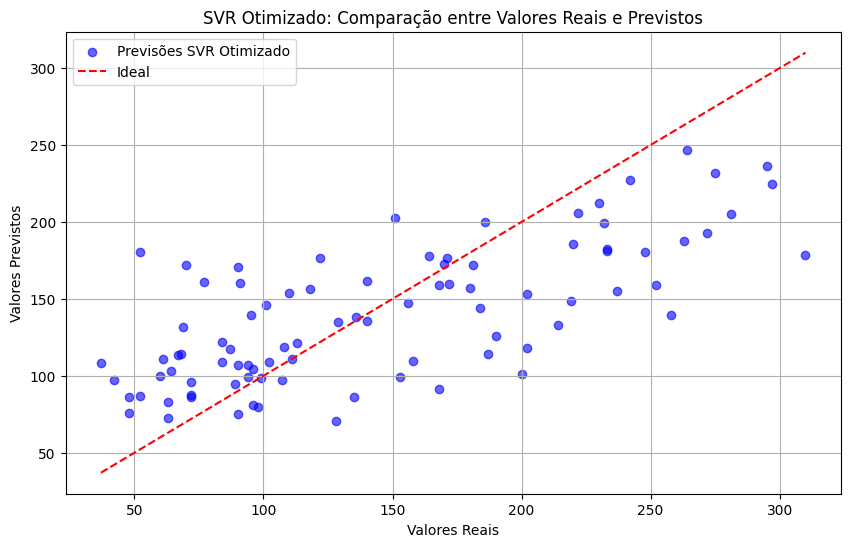

In [11]:
# Criar gráfico para o SVR otimizado
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='blue', alpha=0.6, label='Previsões SVR Otimizado')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('SVR Otimizado: Comparação entre Valores Reais e Previstos')
plt.legend()
plt.grid()
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV
# Importações necessárias
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ajuste mais específico no GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],  # Menor variação em C
    'epsilon': [0.1, 0.2, 0.5],  # Menor variação para epsilon
    'gamma': ['scale', 'auto', 0.1]  # Tentar valores mais restritos para gamma
}

# Configurar e rodar o GridSearchCV
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_
print("\nMelhores parâmetros encontrados:", grid_search.best_params_)

# Avaliar o modelo otimizado
y_pred_best = best_model.predict(X_test_scaled)
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("\nMétricas de Avaliação - Modelo SVR Otimizado com kernel rbf:")
print(f"Mean Squared Error (MSE): {mse_best:.2f}")
print(f"Mean Absolute Error (MAE): {mae_best:.2f}")
print(f"R² Score: {r2_best:.2f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits

Melhores parâmetros encontrados: {'C': 10, 'epsilon': 0.5, 'gamma': 'auto'}

Métricas de Avaliação - Modelo SVR Otimizado com kernel rbf:
Mean Squared Error (MSE): 2679.95
Mean Absolute Error (MAE): 41.29
R² Score: 0.49


In [ ]:
# Criar gráfico para o SVR otimizado
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='blue', alpha=0.6, label='Previsões SVR Otimizado')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('SVR Otimizado: Comparação entre Valores Reais e Previstos')
plt.legend()
plt.grid()
plt.show()

---

    SVM Regressor (_SVR_)

In [ ]:
# from mvpa2.suite import *

ModuleNotFoundError: No module named 'mvpa2'

In [ ]:
from sklearn.svm import SVR

In [ ]:
# Divisão de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementação do SVM para regressão
svr_model = SVR(kernel='rbf')  # kernel rbf (radial basis function)
svr_model.fit(X_train, y_train)

# Avaliação do modelo de regressão
y_pred = svr_model.predict(X_test)
print("MSE para SVR:", mean_squared_error(y_test, y_pred))

NameError: name 'mean_squared_error' is not defined

---

    CNN (_Convolutional Neural Network_)

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


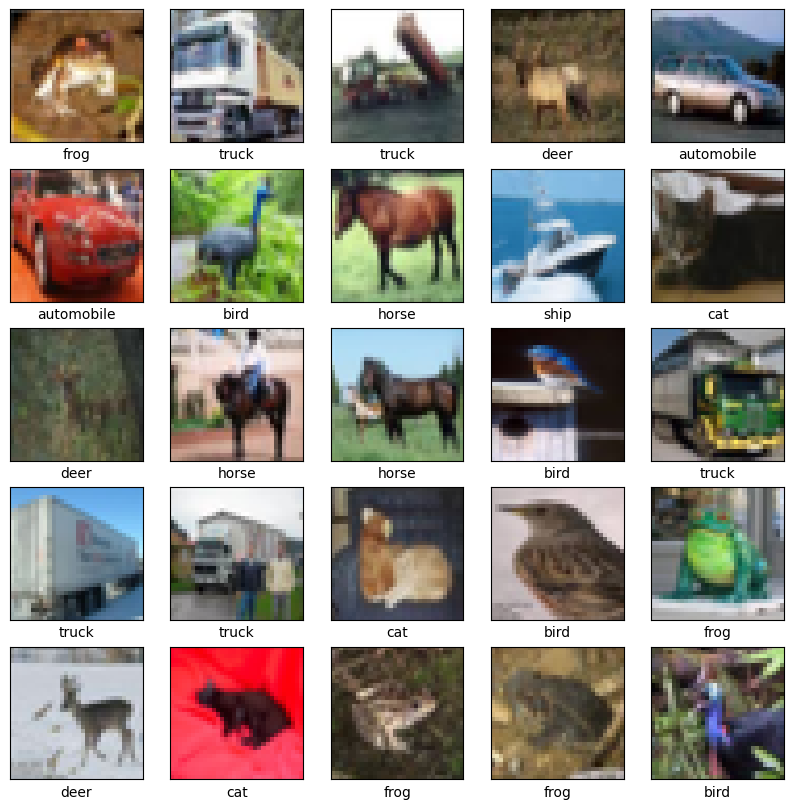

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - accuracy: 0.3506 - loss: 1.7411 - val_accuracy: 0.5396 - val_loss: 1.2823
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.5735 - loss: 1.1954 - val_accuracy: 0.6184 - val_loss: 1.0766
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 52ms/step - accuracy: 0.6398 - loss: 1.0241 - val_accuracy: 0.6530 - val_loss: 0.9688
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.6841 - loss: 0.9056 - val_accuracy: 0.6828 - val_loss: 0.9034
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.7122 - loss: 0.8256 - val_accuracy: 0.6885 - val_loss: 0.8861
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.7255 - loss: 0.7714 - val_accuracy: 0.7063 - val_loss: 0.8530
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.7508 - loss: 0.7193 - val_accuracy: 0.7065 - val_loss: 0.8719
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.7615 -

313/313 - 4s - 11ms/step - accuracy: 0.7169 - loss: 0.8489


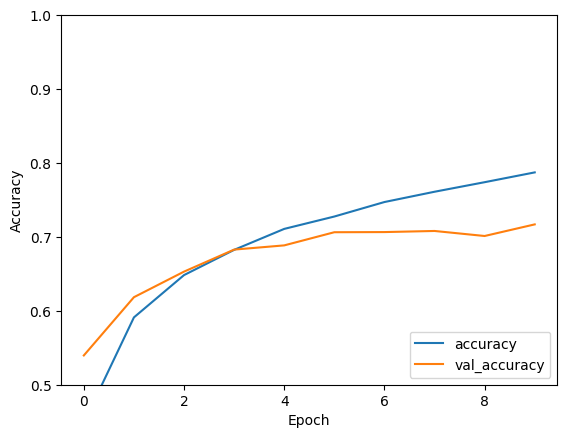

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.7168999910354614


---
---


## Fim do TP!